<a href="https://colab.research.google.com/github/GogulnathM/Housepriceprediction/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 94.8 MB/s eta 0:00:00


In [ ]:
!wget -P -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10n.pt

In [ ]:
!pip install -q roboflow

In [ ]:
from roboflow import Roboflow
rf = Roboflow("d5RU6dklzlwjWeZdMLx2")
project = rf.workspace("clg-vtj9f").project("blood-cell-detection-bsbvn")
version = project.version(3)
dataset = version.download("yolov8")

In [ ]:
!pip install -U ultralytics



In [6]:
!yolo task=detect mode=train epochs=25 batch=32 plots=True \
model=/content/-q/yolov10n.pt \
data=/content/blood-cell-detection-3/data.yaml


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/blood-cell-detection-3/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=Fal

In [7]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt \
data=/content/blood-cell-detection-3/data.yaml


Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10n summary (fused): 102 layers, 2,265,753 parameters, 0 gradients, 6.5 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1734.1±567.5 MB/s, size: 58.3 KB)
val: Scanning /content/blood-cell-detection-3/valid/labels.cache... 94 images, 0 backgrounds, 0 corrupt: 100% 94/94 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 6/6 [00:03<00:00,  1.65it/s]
                   all         94       1781      0.812      0.849      0.864      0.543
                   RBC         94       1617      0.825      0.828      0.887      0.624
                   WBC         92         95      0.929      0.968      0.972      0.625
             platelets         42         69      0.684      0.751      0.734       0.38
Speed: 4.2ms preprocess, 5.8ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https

In [8]:
from ultralytics import YOLO

model_path = "/content/runs/detect/train/weights/best.pt"
model = YOLO(model_path)  # Automatically detects it's a YOLOv10 model
model(source="/content/blood-cell-detection-3/valid/images", conf=0.25, save=True)



image 1/94 /content/blood-cell-detection-3/valid/images/BloodImage_00004_jpg.rf.8c4942249bc11ec0cd984f9ee3476691.jpg: 640x640 26 RBCs, 1 WBC, 12.5ms
image 2/94 /content/blood-cell-detection-3/valid/images/BloodImage_00007_jpg.rf.d73cf3f7bf57caabf8498d34921d332c.jpg: 640x640 19 RBCs, 1 platelets, 9.2ms
image 3/94 /content/blood-cell-detection-3/valid/images/BloodImage_00009_jpg.rf.8222cec3b2f475b3421ba658ab7e725a.jpg: 640x640 24 RBCs, 1 WBC, 1 platelets, 8.5ms
image 4/94 /content/blood-cell-detection-3/valid/images/BloodImage_00018_jpg.rf.7294ed2c9bdecc0f66bfef40d045ca44.jpg: 640x640 22 RBCs, 1 WBC, 8.5ms
image 5/94 /content/blood-cell-detection-3/valid/images/BloodImage_00019_jpg.rf.d325f35f8c87d88de75c45b3c37ebbaf.jpg: 640x640 23 RBCs, 1 WBC, 2 plateletss, 8.5ms
image 6/94 /content/blood-cell-detection-3/valid/images/BloodImage_00028_jpg.rf.8a61d60c7947ce33d0f8381f66d51b67.jpg: 640x640 24 RBCs, 1 WBC, 8.0ms
image 7/94 /content/blood-cell-detection-3/valid/images/BloodImage_00031_jpg.

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'RBC', 1: 'WBC', 2: 'platelets'}
 obb: None
 orig_img: array([[[ 66,  57,  70],
         [ 56,  47,  60],
         [ 42,  35,  48],
         ...,
         [180, 179, 175],
         [169, 168, 164],
         [160, 159, 155]],
 
        [[ 70,  61,  74],
         [ 61,  52,  65],
         [ 45,  38,  51],
         ...,
         [174, 173, 169],
         [165, 164, 160],
         [157, 156, 152]],
 
        [[ 75,  66,  79],
         [ 67,  58,  71],
         [ 52,  45,  58],
         ...,
         [173, 172, 168],
         [166, 165, 161],
         [161, 160, 156]],
 
        ...,
 
        [[142, 146, 140],
         [134, 138, 132],
         [132, 136, 130],
         ...,
         [157, 167, 161],
         [142, 152, 146],
         [132, 142, 136]],
 
        [[142, 146, 140],
         [134, 138, 132],
         [132, 136, 130],
         

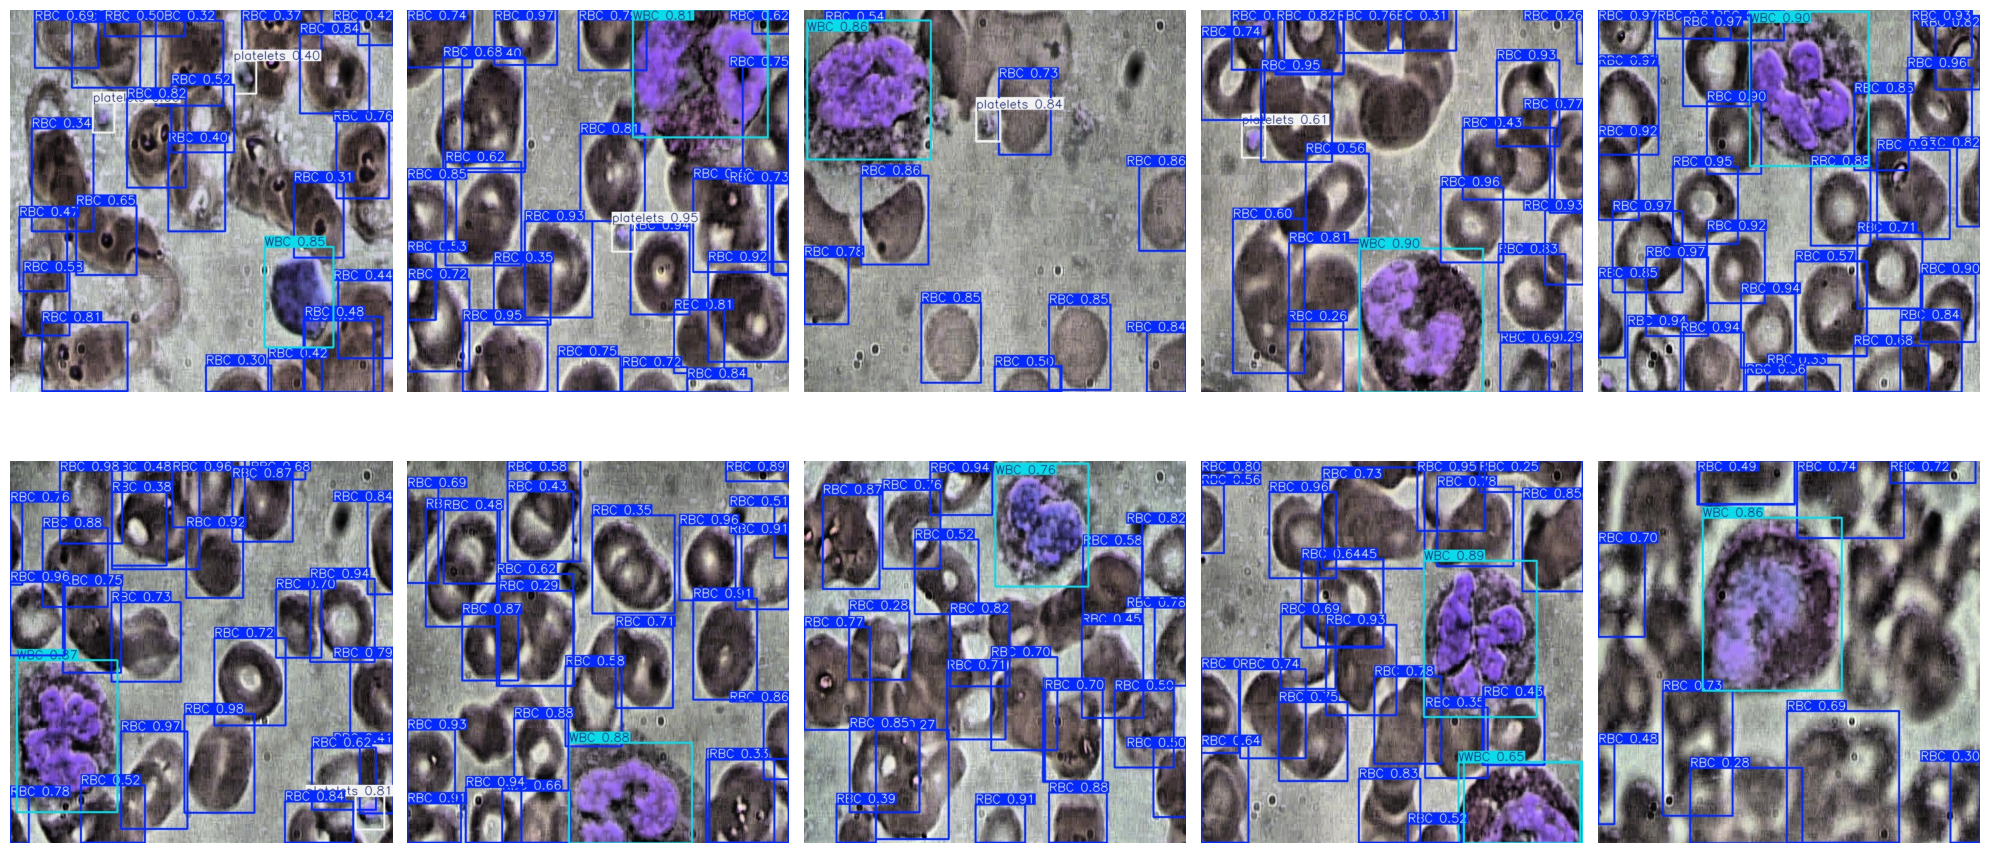

In [9]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
images = glob.glob("/content/runs/detect/predict/*.jpg")
images_to_display = images[:10]
fig, axes = plt.subplots(2,5, figsize=(20,10))
for i, ax in enumerate(axes.flat):
  if i<len(images_to_display):
    img = mpimg.imread(images_to_display[i])
    ax.imshow(img)
    ax.axis("off")
  else:
    ax.axis("off")
plt.tight_layout()
plt.show()



image 1/1 /content/blood-cell-detection-3/valid/images/BloodImage_00004_jpg.rf.8c4942249bc11ec0cd984f9ee3476691.jpg: 640x640 26 RBCs, 1 WBC, 12.6ms
Speed: 2.9ms preprocess, 12.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
RBC:26, WBC:1


array([[[ 70,  57,  66],
        [ 60,  47,  56],
        [ 48,  35,  42],
        ...,
        [175, 179, 180],
        [164, 168, 169],
        [155, 159, 160]],

       [[ 74,  61,  70],
        [ 65,  52,  61],
        [ 51,  38,  45],
        ...,
        [169, 173, 174],
        [160, 164, 165],
        [152, 156, 157]],

       [[ 79,  66,  75],
        [ 71,  58,  67],
        [ 58,  45,  52],
        ...,
        [168, 172, 173],
        [161, 165, 166],
        [156, 160, 161]],

       ...,

       [[140, 146, 142],
        [132, 138, 134],
        [130, 136, 132],
        ...,
        [161, 167, 157],
        [146, 152, 142],
        [136, 142, 132]],

       [[140, 146, 142],
        [132, 138, 134],
        [130, 136, 132],
        ...,
        [159, 165, 155],
        [143, 149, 139],
        [134, 140, 130]],

       [[140, 146, 142],
        [132, 138, 134],
        [130, 136, 132],
        ...,
        [157, 163, 153],
        [142, 148, 138],
        [133, 139, 129]]], dtype=uint8)
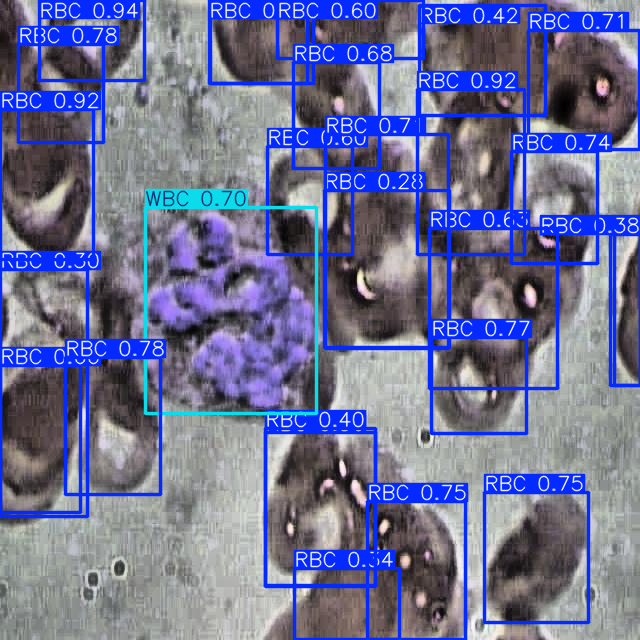

In [10]:
from collections import Counter
result = model.predict(source="/content/blood-cell-detection-3/valid/images/BloodImage_00004_jpg.rf.8c4942249bc11ec0cd984f9ee3476691.jpg",imgsz=640, conf=0.25)
annotated_img = result[0].plot()
detections = result[0].boxes.data
class_names = [model.names[int(cls)] for cls in detections[:,5]]
count =Counter(class_names)
detection_str = ', '.join([f"{name}:{count}" for name, count in count.items()])
print(detection_str)
annotated_img[:,:, ::-1]

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 131.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.6 MB/s eta 0:00:00


In [ ]:
import gradio as gr
import cv2
import numpy as np
from collections import Counter
def predict(image):
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  result = model.predict(source=image_rgb,imgsz=640, conf=0.25)
  annotated_img = result[0].plot()
  detections = result[0].boxes.data
  class_names = [model.names[int(cls)] for cls in detections[:,5]]
  count =Counter(class_names)
  detection_str = ', '.join([f"{name}:{count}" for name, count in count.items()])
  annotated_img = annotated_img[:,:, ::-1]
  return annotated_img, detection_str

app = gr.Interface(
    predict,
    inputs = gr.Image(type="numpy", label="Upload an Image"),
    outputs = [gr.Image(type="numpy", label="Anotated Image"), gr.Textbox(label="Detection Counts")],
    title = "Blood Cell Detection Using YOLOV10",
    description = "Upload an Image and the YoloV10 will detect."
)
app.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://99d3fae3478b333c4f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
